In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#Connection data:
database = input("Digite o nome do Banco de Dados a ser acessado:")
postgresuser = input("Usuário:")
postgrespassword = input("Senha:")
hosts_ip = input("IP:")
conn_port = input("Porta:")


# Connect the database
conn = psycopg2.connect(
    dbname = database,
    user = postgresuser,
    password = postgrespassword,
    host = hosts_ip,
    port = conn_port
)

# Open cursor to perform database operations
cur = conn.cursor()
cur1 = conn.cursor()
cur2 = conn.cursor()
cur3 = conn.cursor()
cur4 = conn.cursor()

# Query the database and obtain data as Python objects
#cur.execute("SELECT id, qt_setores FROM pres_vargas.censo2010_aa_ponderacao_for_mar")
#cur.execute("SELECT * FROM pnadc.pnadc_2012_visita1_20190516")
cur.execute("SELECT uf, v1022, v1023, v1030, v2001, v2005 FROM pnadc.pnadc_2017_visita5_ce")
cur.fetchall()


Digite o nome do Banco de Dados a ser acessado:gis
Usuário:davi_ramalho
Senha:Davi2019
IP:200.129.40.142
Porta:5432


[(23, 1, 1, 2625240, 1, 1),
 (23, 1, 1, 2625240, 1, 1),
 (23, 1, 1, 2625240, 2, 1),
 (23, 1, 1, 2625240, 2, 2),
 (23, 1, 1, 2625240, 3, 1),
 (23, 1, 1, 2625240, 3, 5),
 (23, 1, 1, 2625240, 3, 10),
 (23, 1, 1, 2625240, 1, 1),
 (23, 1, 1, 2625240, 4, 1),
 (23, 1, 1, 2625240, 4, 2),
 (23, 1, 1, 2625240, 4, 4),
 (23, 1, 1, 2625240, 4, 5),
 (23, 1, 1, 2625240, 2, 1),
 (23, 1, 1, 2625240, 2, 2),
 (23, 1, 1, 2625240, 5, 1),
 (23, 1, 1, 2625240, 5, 2),
 (23, 1, 1, 2625240, 4, 4),
 (23, 1, 1, 2625240, 5, 4),
 (23, 1, 1, 2625240, 5, 7),
 (23, 1, 1, 2625240, 5, 10),
 (23, 1, 4, 5110748, 3, 1),
 (23, 1, 4, 5110748, 3, 5),
 (23, 1, 4, 5110748, 3, 5),
 (23, 1, 4, 5110748, 2, 1),
 (23, 1, 4, 5110748, 2, 2),
 (23, 1, 4, 5110748, 3, 1),
 (23, 1, 4, 5110748, 3, 2),
 (23, 1, 4, 5110748, 5, 4),
 (23, 2, 4, 5110748, 2, 5),
 (23, 1, 4, 5110748, 3, 4),
 (23, 1, 4, 5110748, 6, 1),
 (23, 1, 4, 5110748, 6, 5),
 (23, 1, 4, 5110748, 6, 5),
 (23, 1, 4, 5110748, 6, 12),
 (23, 1, 4, 5110748, 6, 14),
 (23, 1, 4, 5110

In [3]:
cur1.execute("SELECT v1023 FROM pnadc.pnadc_2017_visita5_ce")
x = cur1.fetchall()
data = pd.DataFrame(x)
data

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [4]:
cur2.execute("SELECT v2005 FROM pnadc.pnadc_2017_visita5_ce")
y = cur2.fetchall()
data = pd.DataFrame(y)
data

,0
0,1
1,1
2,1
3,2
4,1
5,5
6,10
7,1
8,1
9,2


In [5]:
data.describe()

,0
count,23282.000000
mean,3.483635
std,2.965143
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,19.000000


In [6]:
data.dtypes

0    int64
dtype: object

In [21]:
cur3.execute("SELECT upa FROM pnadc.pnadc_2017_visita5_ce")
cur4.execute("SELECT v2005 FROM pnadc.pnadc_2017_visita5_ce")
w = cur3.fetchall()
z = cur4.fetchall()

df3 = pd.DataFrame(y, w)
df3

,0
"(230000060,)",1
"(230000060,)",1
"(230000060,)",1
"(230000060,)",2
"(230000060,)",1
"(230000060,)",5
"(230000060,)",10
"(230000060,)",1
"(230000060,)",1
"(230000060,)",2


In [22]:
df3.dtypes

0    int64
dtype: object

In [23]:
df3.describe()

,0
count,23282.000000
mean,3.483635
std,2.965143
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,19.000000


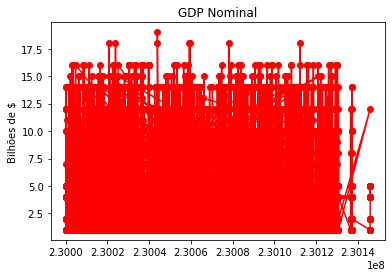

In [24]:
Cid = w
cd_aponde = z

# Cria um gráfico de linha, anos no x, gdp no eixo y
plt.plot(w, z, color='red', marker='o', linestyle='solid')
#plt.plot(z, color='green', marker='o', linestyle='solid')

# Adiciona um título
plt.title("GDP Nominal")

# Adiciona um selo no eixo y
plt.ylabel("Bilhões de $")
plt.show()
#plt.savefig()

In [25]:

# Close comunication the database
cur.close()
cur1.close()
cur2.close()
cur3.close()
cur4.close()
conn.close()